# Question 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
url = 'http://data.un.org/_Docs/SYB/CSV/SYB64_246_202110_Population%20Growth,%20Fertility%20and%20Mortality%20Indicators.csv'
df = pd.read_csv(url, encoding='ISO-8859-1',header=1)

# Question 2

In [3]:
df.info() # 626 entry is where it breaks down by country

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4899 entries, 0 to 4898
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Region/Country/Area  4899 non-null   int64 
 1   Unnamed: 1           4899 non-null   object
 2   Year                 4899 non-null   int64 
 3   Series               4899 non-null   object
 4   Value                4899 non-null   object
 5   Footnotes            4263 non-null   object
 6   Source               4899 non-null   object
dtypes: int64(2), object(5)
memory usage: 268.0+ KB


In [4]:
df = df.rename(columns={"Region/Country/Area":"ID","Unnamed: 1":"Country"})

In [5]:
df_countries = df.loc[df.index[625:4898]] # selecting the rows that are countries
df_countries = df_countries.loc[df_countries['Series'] == 'Life expectancy at birth for both sexes (years)'] # selecting rows that value is 'Life expectancy at birth for both sexes (years)'
df_countries

,ID,Country,Year,Series,Value,Footnotes,Source
628,4,Afghanistan,2010,Life expectancy at birth for both sexes (years),59.6,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
635,4,Afghanistan,2015,Life expectancy at birth for both sexes (years),62.3,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
642,4,Afghanistan,2020,Life expectancy at birth for both sexes (years),64.3,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
649,8,Albania,2010,Life expectancy at birth for both sexes (years),75.6,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
656,8,Albania,2015,Life expectancy at birth for both sexes (years),77.5,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
...,...,...,...,...,...,...,...
4868,894,Zambia,2015,Life expectancy at birth for both sexes (years),59.3,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
4875,894,Zambia,2020,Life expectancy at birth for both sexes (years),63.3,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
4882,716,Zimbabwe,2010,Life expectancy at birth for both sexes (years),45.0,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
4889,716,Zimbabwe,2015,Life expectancy at birth for both sexes (years),56.7,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."


In [6]:
arr_countries = df_countries.to_numpy() # Changing dataframe to an array

print(f"Size N of dataset: {arr_countries.shape[0]}")

Size N of dataset: 603


# Question 3

In [7]:
df_countries.Value.unique().tolist()

['59.6',
 '62.3',
 '64.3',
 '75.6',
 '77.5',
 '78.4',
 '74.2',
 '75.5',
 '76.6',
 '52.7',
 '57.7',
 '60.5',
 '76.1',
 '76.8',
 '74.9',
 '75.7',
 '76.4',
 '72.7',
 '74.0',
 '74.7',
 '75.4',
 '81.5',
 '82.4',
 '83.2',
 '80.1',
 '81.0',
 '81.4',
 '70.1',
 '71.6',
 '72.8',
 '72.0',
 '72.5',
 '73.7',
 '77.1',
 '68.8',
 '70.8',
 '72.2',
 '78.1',
 '78.6',
 '79.0',
 '69.3',
 '72.4',
 '74.5',
 '79.6',
 '80.5',
 '70.7',
 '73.4',
 '74.4',
 '58.6',
 '59.9',
 '61.3',
 '67.0',
 '69.4',
 '71.3',
 '66.6',
 '71.1',
 '76.5',
 '77.2',
 '55.9',
 '64.4',
 '69.1',
 '74.3',
 '75.0',
 '73.1',
 '74.8',
 '55.3',
 '58.7',
 '60.9',
 '58.9',
 '61.0',
 '70.6',
 '71.5',
 '65.1',
 '67.6',
 '54.0',
 '56.3',
 '58.8',
 '80.8',
 '81.8',
 '82.2',
 '46.0',
 '48.9',
 '49.5',
 '52.3',
 '53.8',
 '80.9',
 '82.0',
 '82.8',
 '78.2',
 '79.3',
 '80.0',
 '75.1',
 '83.4',
 '84.6',
 '82.1',
 '83.3',
 '84.0',
 '76.0',
 '77.0',
 '62.8',
 '64.0',
 '58.2',
 '61.7',
 '64.2',
 '79.2',
 '51.4',
 '54.6',
 '57.2',
 '77.4',
 '78.5',
 '78.7',
 

In [8]:
df_countries.Value.describe() 

# Value column is as object. This is incorrect as there are numerical values we need to extract. Therefore, we need to convert these into floats.
# We convert to floats and not integers because we're dealing with decimals, as opposed to whole numbers.

count      603
unique     268
top       75.0
freq         8
Name: Value, dtype: object

In [9]:
df_countries['Value'] = df_countries['Value'].astype('float')

In [10]:
df_countries['Value'].describe()

count    603.000000
mean      71.182753
std        8.553886
min       43.100000
25%       66.050000
50%       73.100000
75%       77.700000
max       84.600000
Name: Value, dtype: float64

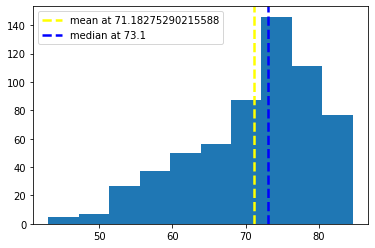

In [11]:
Mean=df_countries['Value'].mean()
Median=df_countries['Value'].median()
v_lines = [Mean,Median]
names = ["mean", "median"]
colors = ['yellow', 'blue']

plt.hist(df_countries['Value'], 10)
for v_lines, name, color in zip(v_lines, names, colors):
    plt.axvline(x=v_lines, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, v_lines), c=color)
plt.legend();

The median is greater than the mean. Therefore the distribution of this dataset is negatively skewed.

# Question 4

In [12]:
max = df_countries['Value'].max()
min = df_countries['Value'].min()

range = max - min

std = df_countries['Value'].std()

q3,q1 = np.percentile(df_countries['Value'],[75,25])

iqr = q3 - q1

print(f"Range: {range}")
print(f"Standard Deviation: {std}")
print(f"IQR: {iqr}")

Range: 41.49999999999999
Standard Deviation: 8.553886318304821
IQR: 11.650000000000006


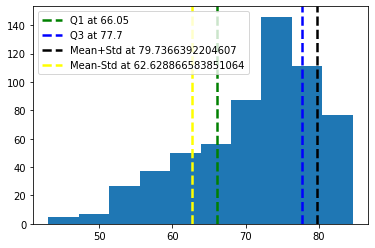

In [13]:
v_lines1 = [q1,q3,(Mean+std),(Mean-std)]
names1 = ["Q1", "Q3","Mean+Std","Mean-Std"]
colors1 = ['green', 'blue', 'black','yellow']

plt.hist(df_countries['Value'], 10)
for v_lines1, name, color in zip(v_lines1, names1, colors1):
    plt.axvline(x=v_lines1, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, v_lines1), c=color)
plt.legend();

#Question 5
So there are some important things to consider first:

1) Life expentancy (i.e. age) is a non negative value. Whilst intuition tells us that no one will be 200 or 300 years old, we know for certain that no one can be less than 0 years old.
Furthermore, Life expectancy can take an infinite number of values within the range of lets say 0-100. Values like 82.1 and 82.3 are both distinct values and this can apply to even greater degrees of decimal places. 

2) Our distribution is negatively skewed.

3) There are a plethora of factors that contribute to life expentancy (i.e. genetics, socio-economic, gender etc).

Considering all these factors, firstly I would say that the class most suitable for modelling life expectancy would be countinous supported by real numbers.

Secondly, I'd say that the Normal distribution would model life expectancy best. I say this because given the numerous factors that influence life expentancy, given a large enough sample size, the distribution of the mean will most likely follow a normal one.



For Normal

In [ ]:
from scipy.stats import norm
mu, sigma = [Mean], [std]


# generate random numbers and plot histogram
r = norm.rvs(mu,sigma,300)
counts, bins = np.histogram(r,10)
plt.hist(r, bins)

mean = norm.mean(mu)
median = norm.median(Median)
sample_mean = np.mean(r)
sample_median = np.median(r)
sample_q3,sample_q1 = np.percentile(r,[75,25])

print(f"Mean: {mean}")
print(f"Sample Mean: {sample_mean}")
print(f"Median: {median}")
print(f"Sample Median: {sample_median}")

plt.axvline(x=sample_mean, color='yellow', label='sample mean',linestyle='--')
plt.axvline(x=sample_median, color='blue', label='sample median',linestyle='--')
plt.axvline(x=sample_q3, color='red', label='sample q3',linestyle='--')
plt.axvline(x=sample_q1, color='black', label='sample q1',linestyle='--')
plt.legend()
plt.show()